# Homework 1 - Exercise 3

[(1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (3, 9), (4, 5), (4, 9), (5, 14), (6, 7), (6, 10), (7, 8), (7, 10), (8, 9), (8, 11), (9, 13), (9, 12), (13, 14), (13, 17), (14, 17), (10, 11), (10, 15), (11, 12), (11, 15), (15, 16), (12, 13), (16, 17)]


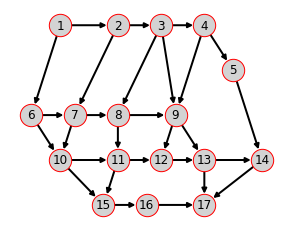

In [114]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.io 
import scipy
import cvxpy as cp
%matplotlib inline

np.set_printoptions(precision=2, suppress= True)

file = scipy.io.loadmat('capacities.mat')
capacities = file.get('capacities')
capacities = capacities.reshape(28,)

file = scipy.io.loadmat('traveltime.mat')
traveltime = file.get('traveltime')
traveltime = traveltime.reshape(28,)

file = scipy.io.loadmat('flow.mat')
flow = file.get('flow')
flow = flow.reshape(28,)

file = scipy.io.loadmat('traffic.mat')
traffic = file.get('traffic')

# creation of Graph
G = nx.DiGraph()
    
for c in range(28):
    capac = capacities[c]
    travtime = traveltime[c]
    for r in range(17):
        if traffic[r][c]==1:
            i=r
        if traffic[r][c]==-1:
            j=r
    G.add_edges_from([(i+1,j+1)], capacity=capac, traveltime=travtime)

edges = G.edges()
print(edges)

#label = capacities.astype(str)
#zip_operator = zip(G.edges(), label)
# labels = dict(zip_operator)
# nx.draw_networkx_edge_labels(G,pos,edge_labels = labels, font_color='red')

#draw Graph
fig, ax = plt.subplots(figsize=(5,4))

pos = {1:[-3,1], 2:[-1,1], 3:[0.5,1], 4:[2,1], 5:[3,0], 6:[-4,-1], 7:[-2.5,-1], 8:[-1,-1], 9:[1,-1], 
       10:[-3,-2], 11:[-1,-2], 12:[0.5,-2], 13:[2,-2], 14:[4,-2], 15:[-1.5,-3], 16:[0,-3], 17:[2,-3]}

nx.draw(G, pos, node_size = 500, font_size=12, node_color='lightgray', with_labels=True, width=2, edge_color = 'black', edgecolors='red', ax=ax)

plt.savefig("plot3.1.svg")

**A)** Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path
with shortest traveling time) in an empty network.

The shortest path from node 1 to node 17:  [1, 2, 3, 9, 13, 17]


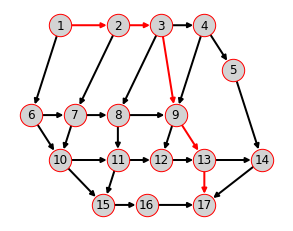

In [115]:
print("The shortest path from node 1 to node 17: ", nx.shortest_path(G, source=1, target=17, weight='traveltime'))

fig, ax = plt.subplots(figsize=(5,4))

edge_colors = ["red","black","red","black","black","black","red","black","black","black",
               "black","black","black","black","black","black","red","black","black","red",
               "black","black","black","black","black","black","black", "black"]
nx.draw(G, pos, node_size = 500, font_size=12, node_color='lightgray', with_labels=True, width=2, edge_color = edge_colors, edgecolors='red', ax=ax)

plt.savefig("plot3.2.svg")

# for path in nx.all_simple_paths(G, source=1, target=17):
#     print(path)

In [116]:
#node-link incidence matrix
B_matrix = traffic 
n_edges = B_matrix.shape[1]

#unitary inflow from node 1 to node 17
nu = np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, -1]) # exogenous flow vector
l = np.array(traveltime)

# Construct the problem.
f = cp.Variable(n_edges)

objective = cp.Minimize(l.T @ f)
constraints = [B_matrix @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()

# The optimal value for f is stored in `f.value`.
print("Optimal f:", f.value)

Optimal f: [1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]


**B)** Find the maximum flow between node 1 and 17.

In [117]:
#nx.algorithms.flow.minimum_cut(G,1,17)
print("Maximum flow from node 1 to 17: ", nx.algorithms.flow.maximum_flow(G,1,17) )

Maximum flow from node 1 to 17:  (22448, {1: {2: 8741, 6: 13707}, 2: {3: 8741, 7: 0}, 3: {4: 0, 8: 0, 9: 8741}, 4: {5: 0, 9: 0}, 5: {14: 0}, 6: {7: 4624, 10: 9083}, 7: {8: 4624, 10: 0}, 8: {9: 4624, 11: 0}, 9: {13: 6297, 12: 7068}, 13: {14: 3835, 17: 10355}, 14: {17: 3835}, 10: {11: 825, 15: 8258}, 11: {12: 825, 15: 0}, 15: {16: 8258}, 12: {13: 7893}, 17: {}, 16: {17: 8258}})


**C)** Given the flow vector in *flow.mat*, compute the external inflow $v$ satisfying $Bf = v$

In [118]:
external_inflow = B_matrix @ flow
external_inflow

array([ 16806,   8570,  19448,   4957,   -746,   4768,    413,     -2,
        -5671,   1169,     -5,  -7131,   -380,  -7412,  -7810,  -3430,
       -23544], dtype=int32)

**D)** Find the social optimum $f^*$ with respect to the delays on the different links $f _{e}d _{e}$, for this minimize cost function $ \sum_{e \in \varepsilon}^{} \left ( \frac{f _{e}l _{e} }{ 1 - f _{e}/C _{e} } - l _{e}C _{e}  \right ) $

In [119]:
# exogenous inflow vector
nu = np.array([16806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, -16806]) 
f = cp.Variable(n_edges)

#cost function 
func = cp.multiply(traveltime*capacities, cp.inv_pos(1 - cp.multiply(f,1/capacities))) - traveltime*capacities                                   
func = cp.sum(func)

# Construct the problem.
# Minimize cost function
objective = cp.Minimize(func)
constraints = [B_matrix @ f == nu, f >=0, f <= capacities]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()

# The optimal value for f is stored in `f.value`.
opt_flow = f.value
print("Social optimal flow:", opt_flow)
print("Optimal cost:", cost_opt)

Social optimal flow: [ 6642.2   6058.94  3132.33  3132.33 10163.8   4638.32  3006.34  2542.63
  3131.54   583.26     0.01  2926.6      0.    3132.33  5525.48  2854.27
  4886.45  2215.24   463.72  2337.69  3317.99  5655.68  2373.11     0.
  6414.12  5505.43  4886.45  4886.45]
Optimal cost: 25943.62261121288


**E)** Find the Wardrop equilibrium $f^{ (0)}$. For this use cost function: $ \sum_{e \in \varepsilon}^{} \int_{0}^{f _{e}} d _{e}(s)ds $

In [120]:
f = cp.Variable(n_edges)

#cost function 
integral = - cp.multiply(traveltime * capacities, cp.log( 1 - (cp.multiply(f, 1/capacities) )))
func2 = cp.sum(integral)

#minimize cost function
objective = cp.Minimize(func2)
constraints = [B_matrix @ f == nu, f >=0, f <= capacities]
prob = cp.Problem(objective, constraints)

cost_w = prob.solve()

print("Wardrop equilibrium flow:", f.value)

war_vect = f.value

Wardrop equilibrium flow: [ 6715.65  6715.65  2367.41  2367.41 10090.35  4645.39  2803.84  2283.56
  3418.48     0.     176.83  4171.41     0.    2367.41  5444.96  2353.17
  4933.34  1841.55   697.11  3036.49  3050.28  6086.77  2586.51     0.
  6918.74  4953.92  4933.34  4933.34]


Compute the cost of wardrop equilibrium with: $\sum_{e \in \varepsilon}^{} f _{e} d _{e}(f _{e}) $ and Price of Anarchy $PoA(0) = \frac {wardrop cost}{social optimum cost}$

In [121]:
# cost, defined as \sum_e f_e d_e(f_e)
def cost(f):
    tot = []
    for i, value in enumerate(f):
        tot.append(((traveltime[i]*capacities[i]) / (1-(value/capacities[i])))-traveltime[i]*capacities[i])
    return sum(tot)

cost_w = cost(war_vect) 

print("Wardrop cost:", cost_w)

PoA = cost_w/cost_opt

print("The price of anarchy:", PoA)  

Wardrop cost: 26292.963874629393
The price of anarchy: 1.013465400289377


**F)** Introduce tolls, such that the toll on link e is $\omega _{e} = f^* _{e}{d _{e}}'(f^* _{e})$, where $f^* _{e}$ is the flow at the system optimum. Now the delay on link e is given by  $ f _{e}d _{e} + \omega _{e} $. compute the new Wardrop equilibrium $ f^{(w)} $.

In [122]:
f = cp.Variable(n_edges)

#compute omega
omega = []
for i, value in enumerate(opt_flow):
    omega.append(value*((capacities[i]*traveltime[i])/((capacities[i]-value)**2)))

func3 = cp.sum(cp.multiply(omega, f) - cp.multiply(capacities*traveltime, cp.log(1-(cp.multiply(f, 1/capacities)))))

objective = cp.Minimize(func3)
constraints = [B_matrix @ f == nu, f >=0, f <= capacities]
prob = cp.Problem(objective, constraints)

result = prob.solve()

print("Wardrop equilibrium with tolls:", f.value)

Wardrop equilibrium with tolls: [ 6642.97  6059.08  3132.47  3132.47 10163.03  4638.26  3006.33  2542.34
  3131.49   583.9      0.    2926.6      0.    3132.47  5524.77  2854.23
  4886.37  2215.83   463.99  2337.45  3318.22  5655.67  2373.04     0.
  6414.12  5505.51  4886.37  4886.37]


In [123]:
war_vect = f.value
#compute cost of wardrop equilibrium
cost_w = cost(war_vect) 

print("Wardrop cost:", cost_w)

PoA = cost_w/cost_opt

print("The price of anarchy:", PoA) 

Wardrop cost: 25943.62261534188
The price of anarchy: 1.000000000159153


**G)** Instead of the total delay, let the cost be the total additional delay compared to the total delay in free flow be given by  $c _{e}f _{e} = f _{e}( d _{e}(f _{e}) - l _{e} )$  subject to the flow constraints. Compute the system optimum $f^*$ for the costs given.

In [124]:
f = cp.Variable(n_edges)

#cost function free flow delay
func4 = cp.sum(cp.multiply( cp.multiply(traveltime, capacities), cp.inv_pos(1 - cp.multiply(f, 1/capacities) ) ) - cp.multiply(traveltime, capacities) - cp.multiply(traveltime,f) )

objective = cp.Minimize(func4)
constraints = [B_matrix @ f == nu, f >=0, f <= capacities]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()

# The optimal value for f is stored in `f.value`.
opt_flow = f.value
print("Social optimal flow:", opt_flow)
print("Optimal cost:", cost_opt)

Social optimal flow: [ 6653.3   5774.66  3419.72  3419.71 10152.7   4642.78  3105.84  2662.18
  3009.08   878.63     0.01  2354.94     0.01  3419.71  5509.92  3043.69
  4881.81  2415.57   443.66  2008.05  3487.35  5495.4   2203.78     0.
  6300.7   5623.49  4881.81  4881.81]
Optimal cost: 15095.51352460787


Construct tolls $\omega^* _{e}$ such that the new Wardrop equilibrium with the constructed tolls $f^{(\omega^*)}$ coincides with $f^{*}$

In [125]:
w = cp.Variable(n_edges)
nu = np.array([16806, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -16806])

# cost function with optimal flow
integral = - cp.multiply(capacities*traveltime, cp.log(1-(cp.multiply(opt_flow, 1/capacities)))) - cp.multiply(opt_flow,traveltime) + cp.multiply(w, opt_flow)
func5 = cp.sum(integral)

objective = cp.Minimize(func5)
constraints = [B_matrix @ w == nu, w>=0]
prob = cp.Problem(objective, constraints)

result_w = prob.solve()

print("Constructed tolls:", w.value)

constr_tolls = w.value

Constructed tolls: [16806.     0.     0.     0.     0.     0. 16806.     0.     0. 16806.
     0.     0.     0.     0.     0.     0.     0.     0. 16806.     0.
     0.     0.     0. 16806.     0.     0. 16806. 16806.]


Compute the new Wardrop equilibrium with the constructed tolls $f^{(\omega^*)}$ to verify your result.

In [128]:
f = cp.Variable(n_edges)
nu = np.array([16806, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -16806])

func = - cp.multiply(capacities*traveltime, cp.log(1-(cp.multiply(f, 1/capacities)))) - cp.multiply(f,traveltime) + cp.multiply(constr_tolls, f)

objective = cp.Minimize(cp.sum(func))
constraints = [B_matrix @ f == nu, f >=0, f <= c, f==opt_flow]
prob = cp.Problem(objective, constraints)

result_w = prob.solve()

print("Wardrop equilibrium:", f.value)

Wardrop equilibrium: [ 6653.3   5774.66  3419.72  3419.71 10152.7   4642.78  3105.84  2662.18
  3009.08   878.63     0.01  2354.94     0.01  3419.71  5509.92  3043.69
  4881.81  2415.57   443.66  2008.05  3487.35  5495.4   2203.78     0.
  6300.7   5623.49  4881.81  4881.81]


Compute the cost of wardrop equilibrium with: $\sum_{e \in \varepsilon}^{} f _{e} d _{e}(f _{e}) $ and Price of Anarchy $PoA(0) = \frac {wardrop cost}{social optimum cost}$

In [129]:
def cost2(f):
    tot = []
    for i, value in enumerate(f):
        tot.append(((l[i]*c[i]) / (1-(value/c[i])))-l[i]*c[i]-l[i]*value)
    return sum(tot)

war_vect = f.value
cost_w = cost2(war_vect) 

print("Wardrop cost:", cost_w)

PoA = cost_w/cost_opt

print("The price of anarchy:", PoA) 

Wardrop cost: 15095.513347476217
The price of anarchy: 0.9999999882659406
